# Data collection and pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Reading the data from csv file

In [2]:
df = pd.read_csv('dataset.csv')


Displayng the first 5 rows of data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 Dropping the customer_id as it is not relevant for operations.

In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df['gender'].replace({'Female': 1,'Male':0},inplace=True)
df['Partner'].replace({'No': 0,'Yes':1},inplace=True)
df['Dependents'].replace({'No': 0,'Yes':1},inplace=True)



In [7]:
df.gender.unique()
df.Partner.unique()
df.Dependents.unique()

array([0, 1], dtype=int64)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 I want to scale the value of tenure, monthly charges and total charges between 0 and 1. But the values of total charges are stored as non_numeric and some values are missing too. So, here's the solution.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaling_columns= ['tenure','MonthlyCharges','TotalCharges']

# Converting Total Charges to numeric
# pd.to_numeric(df.TotalCharges)  # There are the null values as " "

pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()



0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,0,0,0,1,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,1,0,1,1,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,0,0,1,1,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1,0,1,1,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,0,0,1,1,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,0,0,1,1,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,1,0,1,1,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,0,0,1,1,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,1,0,1,1,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

Let's Remove these 11 rows that contains  blank values

In [12]:
df = df[df.TotalCharges != " "]
df.shape

(7032, 20)

Now the scaling can be performed.

In [13]:
scaler = MinMaxScaler()
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [14]:
print(df[scaling_columns])

        tenure  MonthlyCharges  TotalCharges
0     0.000000        0.115423      0.001275
1     0.464789        0.385075      0.215867
2     0.014085        0.354229      0.010310
3     0.619718        0.239303      0.210241
4     0.014085        0.521891      0.015330
...        ...             ...           ...
7038  0.323944        0.662189      0.227521
7039  1.000000        0.845274      0.847461
7040  0.140845        0.112935      0.037809
7041  0.042254        0.558706      0.033210
7042  0.915493        0.869652      0.787641

[7032 rows x 3 columns]


In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,0,0,0,0,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,0,0,0,0,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,0,0,0,0,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,1,0,0,0,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


In [16]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['PhoneService'].replace({'Yes':1 , 'No': 0},inplace=True)


Displaying the categorial values with their unique categories

In [18]:
for columns in df:
    if df[columns].dtype == 'object':
        print(f'{columns}:{df[columns].unique()}')

MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [19]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

yes_no_columns = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

One Hot encoding for categorial values

In [21]:
df = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df.shape

(7032, 27)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

Looking for the description of data

In [24]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,0.463166,0.261309,0.265785
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,0.299363,0.261571,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172512,0.044155,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.518408,0.159090,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.712562,0.435719,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Converting all the boolean values to integer

In [25]:
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

Now, the data is cleaned and ready for further operations.

Counting the data of  target column. 

In [27]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

We found the unchurned customers are way more than churned. So, this is imbalanced dataset.

# Data visualization and Exploratory Data Analysis (EDA)

Box-Plot:

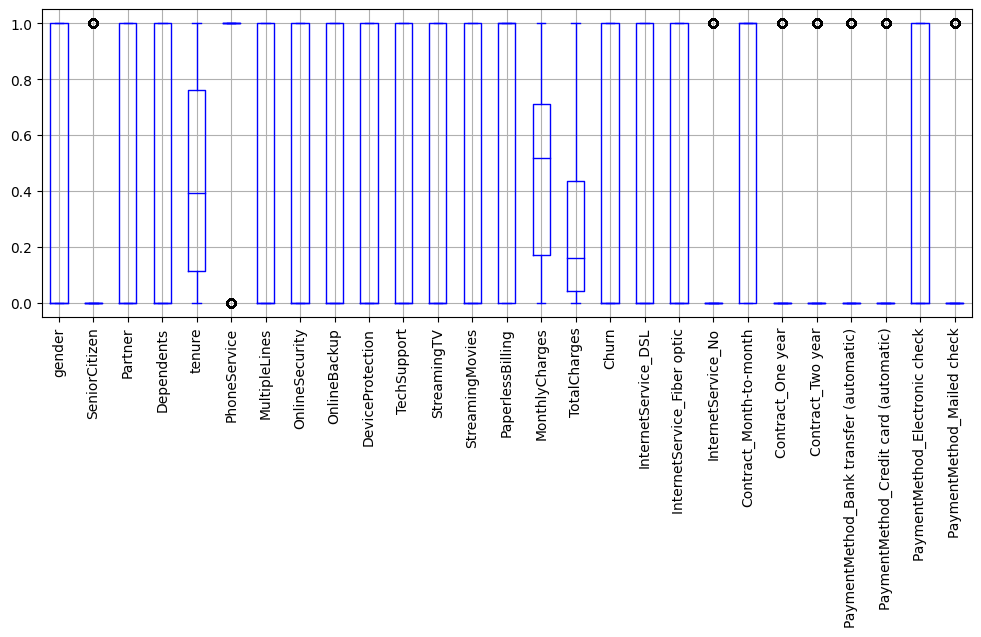

In [28]:
df.boxplot(figsize=(12, 4),color = 'Blue')
plt.xticks(rotation=90)
plt.show()

Analyzing the correlation between the dimensions

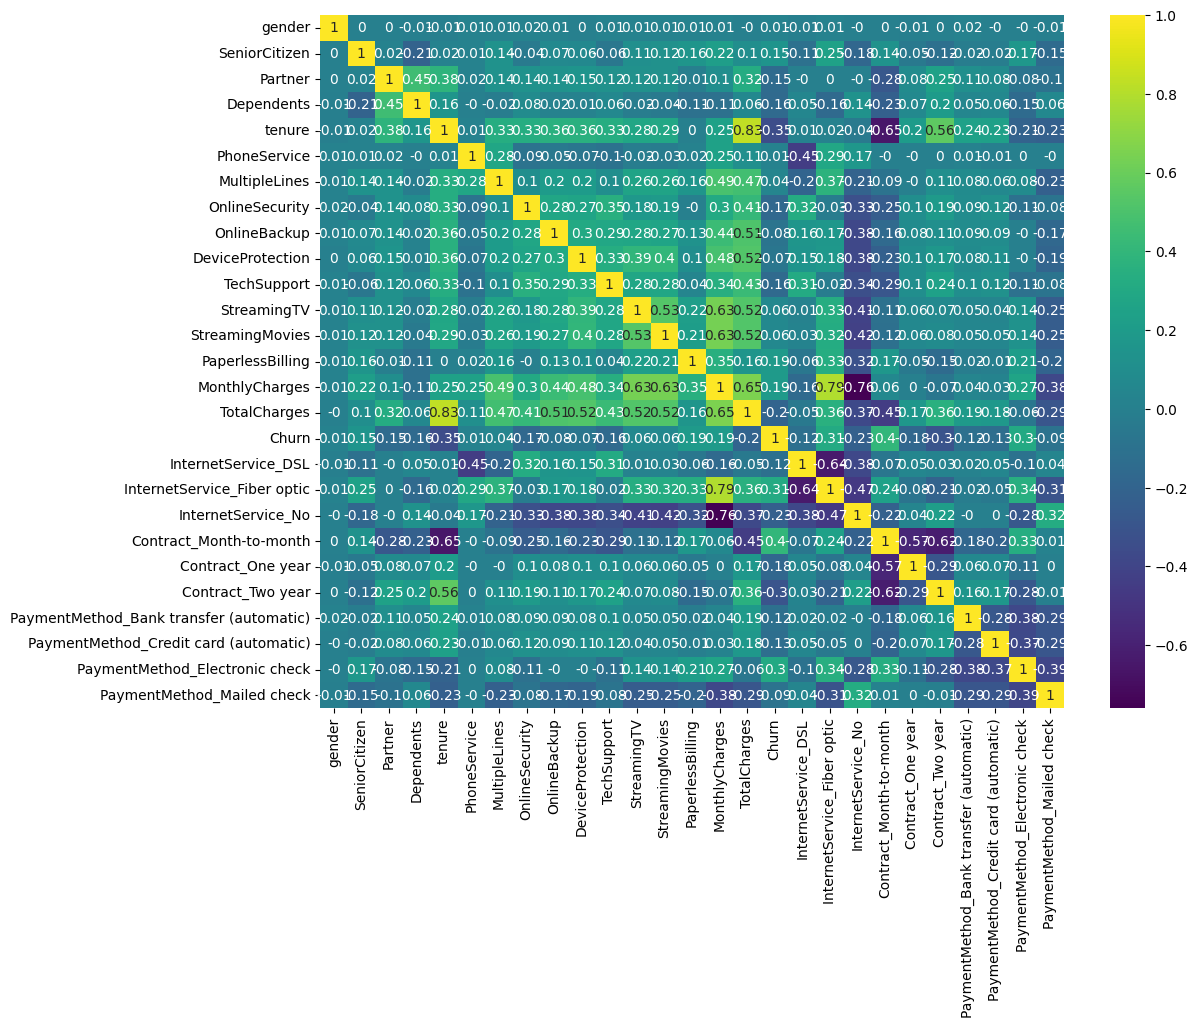

In [29]:
import seaborn as sns
correlation = df.corr()
# Generating a heatmap plot of the correlation matrix for the label-encoded dataset
# correlation = df.corr()
corr_mat=df.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat,annot=True,cmap='viridis')
plt.show()


Displaying the correlation value of Churn with other dimensions.

In [30]:
correlation['Churn']

gender                                     0.008545
SeniorCitizen                              0.150541
Partner                                   -0.149982
Dependents                                -0.163128
tenure                                    -0.354049
PhoneService                               0.011691
MultipleLines                              0.040033
OnlineSecurity                            -0.171270
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
TechSupport                               -0.164716
StreamingTV                                0.063254
StreamingMovies                            0.060860
PaperlessBilling                           0.191454
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetServ

Dropping the less-correlated features

In [31]:
df.drop('gender',axis=1,inplace=True)
df.drop('PhoneService',axis=1,inplace=True)
df.drop('MultipleLines',axis=1,inplace=True)
df.drop('OnlineBackup',axis=1,inplace=True)
df.drop('DeviceProtection',axis=1,inplace=True)
df.drop('StreamingTV',axis=1,inplace=True)
df.drop('StreamingMovies',axis=1,inplace=True)




 Plotting tenure column with count

<Figure size 2000x800 with 0 Axes>

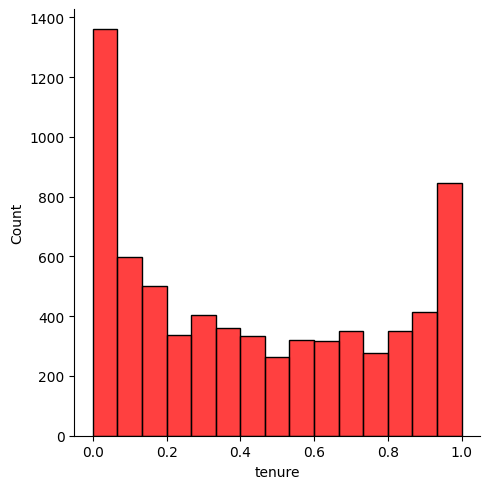

In [32]:
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.displot(df.tenure, color='red')
plt.show()

 Plotting monthly charges column with count

<Figure size 2000x800 with 0 Axes>

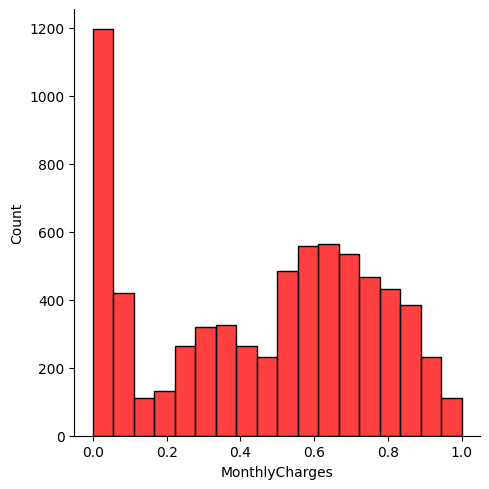

In [33]:

plt.figure(figsize=(20, 8))
sns.displot(df.MonthlyCharges, color='red')
plt.show()

Plotting total charges column with count

<Figure size 2000x800 with 0 Axes>

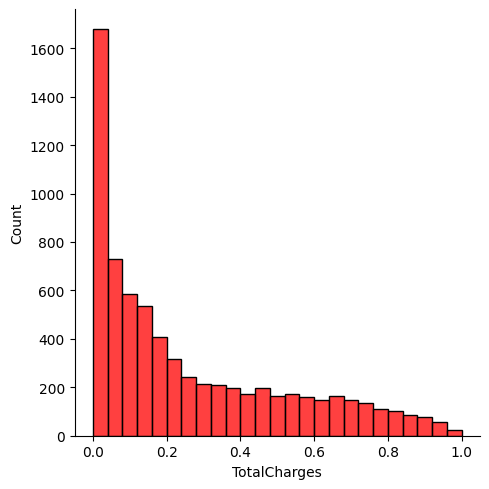

In [34]:

plt.figure(figsize=(20, 8))
sns.displot(df.TotalCharges, color='red')
plt.show()

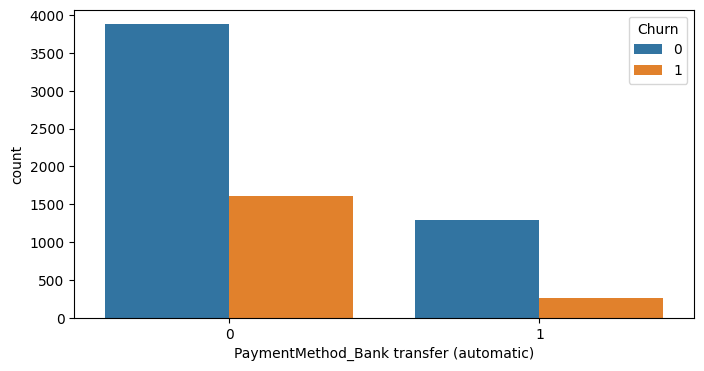

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='PaymentMethod_Bank transfer (automatic)', hue='Churn')
plt.show()

We found that, If the customer doesn't get PaymentMethod_Bank transfer (automatic), then there's high chance of customer leaving for the services.

Relation between PaymentMethod(Mailed_Check) and Churn:

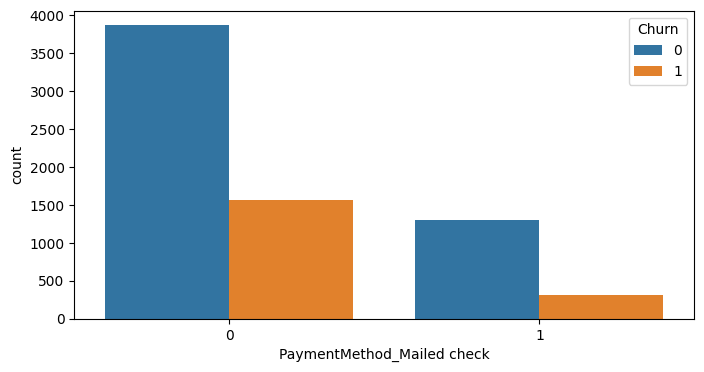

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='PaymentMethod_Mailed check', hue='Churn')
plt.show()


Relation between PaymentMethod Electronic check and Churn:

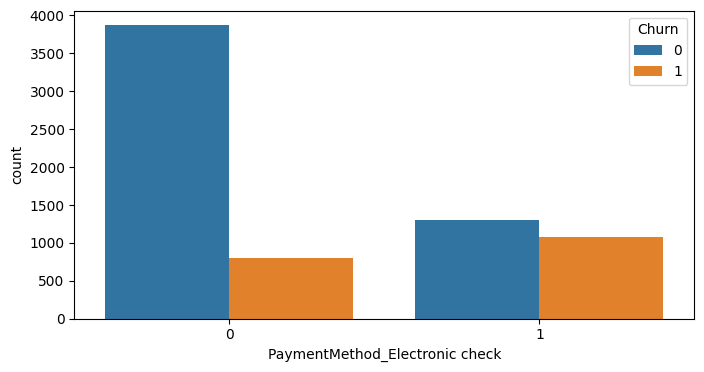

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='PaymentMethod_Electronic check', hue='Churn')
plt.show()

# Model Training

 Train Test Split of the data:

In [38]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train.shape

(5625, 19)

In [41]:
X_test.shape

(1407, 19)

In [42]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0.591549,0,0,1,0.306468,0.237411,1,0,0,1,0,0,1,0,0,0
3410,0,0,0,0.028169,0,0,0,0.349751,0.019605,1,0,0,1,0,0,0,1,0,0
5483,0,1,0,0.760563,0,0,1,0.592040,0.512272,0,1,0,1,0,0,0,0,1,0
5524,0,1,1,0.619718,1,1,0,0.362189,0.292511,1,0,0,0,0,1,1,0,0,0
6337,0,1,1,0.760563,1,0,0,0.822388,0.626564,0,1,0,0,1,0,0,0,0,1


### Training with Artificial Neural Network(ANN):

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = keras.Sequential([
    keras.layers.Dense(19,input_shape=(19,),activation = 'relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=42)),
    Dropout(0.2),
    
    keras.layers.Dense(9,activation = 'relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=42)),
    Dropout(0.2),
    
    keras.layers.Dense(1,activation = 'sigmoid')
    
])

model.summary()



model.compile(optimizer = 'Adam', loss = 'binary_crossentropy' , metrics = ['Precision'])


history = model.fit(X_train,y_train,batch_size=90,verbose=1,epochs=150,validation_split=0.3)


# Another way
# model = Sequential()

# model.add(Dense(11,activation='sigmoid',input_dim=11))
# model.add(Dense(11,activation='sigmoid'))
# model.add(Dense(1,activation='sigmoid'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 180       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
44/44 [==============================] - 3s 17

44/44 [==============================] - 0s 6ms/step - loss: 0.4305 - precision: 0.6676 - val_loss: 0.4125 - val_precision: 0.6773
Epoch 51/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4255 - precision: 0.6560 - val_loss: 0.4116 - val_precision: 0.6784
Epoch 52/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4285 - precision: 0.6613 - val_loss: 0.4116 - val_precision: 0.6775
Epoch 53/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4266 - precision: 0.6529 - val_loss: 0.4123 - val_precision: 0.6819
Epoch 54/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4288 - precision: 0.6639 - val_loss: 0.4126 - val_precision: 0.6825
Epoch 55/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4292 - precision: 0.6523 - val_loss: 0.4128 - val_precision: 0.6810
Epoch 56/150
44/44 [==============================] - 0s 5ms/step - loss: 0.4199 - precision: 0.6616 - val_loss: 0.4126 - val_precision: 0.6801
Epoch

Epoch 107/150
44/44 [==============================] - 0s 5ms/step - loss: 0.4217 - precision: 0.6631 - val_loss: 0.4124 - val_precision: 0.6783
Epoch 108/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4225 - precision: 0.6636 - val_loss: 0.4137 - val_precision: 0.6804
Epoch 109/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4115 - precision: 0.6783 - val_loss: 0.4117 - val_precision: 0.6649
Epoch 110/150
44/44 [==============================] - 0s 5ms/step - loss: 0.4156 - precision: 0.6603 - val_loss: 0.4127 - val_precision: 0.6756
Epoch 111/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4147 - precision: 0.6626 - val_loss: 0.4126 - val_precision: 0.6675
Epoch 112/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4209 - precision: 0.6667 - val_loss: 0.4127 - val_precision: 0.6720
Epoch 113/150
44/44 [==============================] - 0s 6ms/step - loss: 0.4143 - precision: 0.6685 - val_loss: 0.4133 - val_pre

### Evaluation of the model


In [44]:

model.evaluate(X_test,y_test)


44/44 [==============================] - 0s 3ms/step - loss: 0.4377 - precision: 0.6220


[0.4377385973930359, 0.6219931244850159]

Here, the precision is 0.64 and the loss is 0.43. 

Now, predicting in the test data:

In [45]:
y_pred_ann = model.predict(X_test) # returns array

44/44 [==============================] - 0s 2ms/step


In [46]:
print(y_pred_ann)

[[0.0045672 ]
 [0.13288419]
 [0.52596974]
 ...
 [0.06629775]
 [0.13951999]
 [0.00200556]]


In [47]:
print(len(y_pred_ann))

mean = np.mean(y_pred_ann)
print(mean)

1407
0.26185343


In [48]:
y_predicted_ann = []
for element in y_pred_ann:
    if element > 0.5:
        y_predicted_ann.append(1)
    else:
        y_predicted_ann.append(0)


In [49]:
y_predicted_ann[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [50]:
from sklearn.metrics import  precision_score, recall_score

print(precision_score(y_test,y_predicted_ann))
print(recall_score(y_test,y_predicted_ann))

0.6219931271477663
0.4839572192513369


Here, the precision score for the test data is 0.64 and recall score is 0.42

### Training with the Machine Learning models:

Defining the train function:

In [51]:
def train(x_train, y_train, model, hyperparameters):
    """
    Arguments:
    x_train -- input features of the training set
    y_train -- target values of the training set
    model -- an instance of the model class (e.g., LogisticRegression, KNeighborsClassifier, etc.)
    hyperparameters -- dictionary of list of hyperparameter values
    
    Returns:
    best_params -- dictionary of best hyperparameters found
    best_model -- an instance of the model class with tuned hyperparameters
    """
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5)
    grid_search.fit(x_train, y_train)
    
    # Print the best hyperparameters found
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    
    # Train the model with best hyperparameters
    best_model = model.set_params(**best_params)
    best_model.fit(x_train, y_train)
    
    return best_params, best_model

Defining the evaluate_model function:

In [52]:
def evaluate_model(x_test, y_test, best_model):
    """
    Arguments:
    best_model -- an instance of the model class with tuned hyperparameters
    x_test -- input features of the test set
    y_test -- target values of the test set
    
    Returns:
    accuracy -- accuracy score on the test set
    precision -- precision score on the test set
    recall -- recall score on the test set
    f1_score -- F1 score on the test set
    """
    
    # Predict the target values for the test set
    y_pred = best_model.predict(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    return accuracy, precision, recall, f1

### 1.Using KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  precision_score, recall_score, accuracy_score, f1_score


hyperparameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

model = KNeighborsClassifier()
_, best_model_KNN = train(X_train, y_train, model, hyperparameters)
scores = evaluate_model(X_test, y_test, best_model_KNN)

Best Hyperparameters: {'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.7697228144989339
Precision: 0.5816993464052288
Recall: 0.47593582887700536
F1 Score: 0.5235294117647059


### 2.Using Logistic Regression

In [54]:
# 
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


model = LogisticRegression(random_state = 42, max_iter=1000)

hyperparameters = {
    'C': [ 0.1, 0.5, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

_, best_model_log = train(X_train, y_train, model, hyperparameters)
scores_log = evaluate_model(X_test, y_test, best_model_log)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7867803837953091
Precision: 0.6217105263157895
Recall: 0.5053475935828877
F1 Score: 0.5575221238938054


### 3.Naive Bayes Classifier


In [55]:
from sklearn.naive_bayes import GaussianNB

hyperparameters = {
    'var_smoothing': [10**(-x) for x in range(1, 11)]
#     'var_smoothing': [0.005,0.001,0.01]
    
}

model = GaussianNB()
_, best_model_naive = train(X_train, y_train, model, hyperparameters)
scores_naive = evaluate_model(X_test, y_test, best_model_naive)

Best Hyperparameters: {'var_smoothing': 0.001}
Accuracy: 0.728500355366027
Precision: 0.4931740614334471
Recall: 0.7727272727272727
F1 Score: 0.6020833333333333


### 4.Decision Tree Classifier

In [56]:

from sklearn.tree import DecisionTreeClassifier

hyperparameters = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

model = DecisionTreeClassifier()
_, best_model_decision = train(X_train, y_train, model, hyperparameters)
scores_decision = evaluate_model(X_test, y_test, best_model_decision)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.7782515991471215
Precision: 0.581151832460733
Recall: 0.5935828877005348
F1 Score: 0.5873015873015873


### 5.Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

hyperparameters = {
    'n_estimators': [100,120,150],
    'max_depth': [3,5,7,9],
    'min_samples_split': [7,8,10,12]
}

model = RandomForestClassifier()
_, best_model_random = train(X_train, y_train, model, hyperparameters)
scores_random = evaluate_model(X_test, y_test, best_model_random)

Best Hyperparameters: {'max_depth': 9, 'min_samples_split': 12, 'n_estimators': 100}
Accuracy: 0.7910447761194029
Precision: 0.6379310344827587
Recall: 0.4946524064171123
F1 Score: 0.5572289156626505


In [58]:
print(best_model_naive)

GaussianNB(var_smoothing=0.001)


In [59]:
print(scores_naive[2])

0.7727272727272727


We found that the best model we've trained is Naive Baiyes Classifier which gave the recall score of 0.77 with best hyperparameter tuned.

# Predicting the result in new dataset

In [60]:
print(X_train.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [61]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0.591549,0,0,1,0.306468,0.237411,1,0,0,1,0,0,1,0,0,0
3410,0,0,0,0.028169,0,0,0,0.349751,0.019605,1,0,0,1,0,0,0,1,0,0
5483,0,1,0,0.760563,0,0,1,0.592040,0.512272,0,1,0,1,0,0,0,0,1,0
5524,0,1,1,0.619718,1,1,0,0.362189,0.292511,1,0,0,0,0,1,1,0,0,0
6337,0,1,1,0.760563,1,0,0,0.822388,0.626564,0,1,0,0,1,0,0,0,0,1


Giving the input features:

In [62]:
input_data = (0,0,0,0.591549,0,0,1,0.306468,0.237411,1,0,0,1,0,0,1,0,0,0)

Converting the tuple values into numpy array

In [63]:
input_data = np.asarray(input_data)

In [64]:
print(input_data)

[0.       0.       0.       0.591549 0.       0.       1.       0.306468
 0.237411 1.       0.       0.       1.       0.       0.       1.
 0.       0.       0.      ]


Reshaping the data as we have a single sample

In [65]:
input_data = input_data.reshape(1,-1)

 Predicting whether the customer churns or not:

In [66]:
print(best_model_naive.predict(input_data))

[1]


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### We found that the customer have a chance of leaving the service for the given input data.